In [85]:
from __future__ import division
import os,sys

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image,ImageDraw
from os import listdir

# 导入不同分类算法的库
from sklearn.neighbors import KNeighborsClassifier # Sklearn中kNN算法
from sklearn.svm import SVC # SKlearn中SVM算法
from sklearn.tree import DecisionTreeClassifier # SKlearn中决策树算法

# Sklearn中NB算法
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import RandomForestClassifier

In [58]:
def img2vec(filename):
    returnVector = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVector[0,32*i+j]=int(lineStr[j])
    return returnVector

def loadData(folder_name):    
    hwLabels = []
    trainingFieldList = listdir(folder_name)
    m = len(trainingFieldList)
    trainingMat = np.zeros((m,1024))
    for i in range(m):
        fileName= trainingFieldList[i]
        fileStr = fileName.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:]=img2vec(folder_name+fileName)
    return trainingMat,hwLabels

def cal_accuracy(classifierResult,goldLabels):
    mTest = len(classifierResult)
    errorCount = 0.0 # 统计识别错误的样本个数
    for i in range(mTest):
        if classifierResult[i] != goldLabels[i]:
            errorCount += 1.0
    print("\t 测试样本个数为： %d " % mTest)
    print("\t 预测错误个数为： %d " % errorCount)
    print("\t 预测错误率为： %2.2f%% " % (errorCount/float(mTest)*100))
    print("\t 预测准确率为： %2.2f%%" % ((1-errorCount/float(mTest))*100)) 
    return (1-errorCount/float(mTest))

In [137]:
trainingMat,hwLabels = loadData('./data/trainingDigits/')
testMat,goldLabels = loadData('./data/testDigits/')

In [71]:
X = trainingMat
y = hwLabels

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## SCV

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    print(X.shape, y.shape)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [48]:
from sklearn.svm import SVC
X_train,y_train = X, y
tuned_parameters = {'kernel': ['rbf','poly','linear','sigmoid'],
                     'gamma': ['auto',1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]
                    }
score = 'precision'           

clf = GridSearchCV(SVC(), tuned_parameters, cv=10,scoring='%s_macro' % score)
print("--------")
clf.fit(X_train, y_train)         

--------


C:\Users\17668\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\17668\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\17668\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\17668\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

KeyboardInterrupt: 

In [7]:
print(66)

C:\Users\17668\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\17668\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\17668\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\17668\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': ['auto', 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision_macro', verbose=0)

In [9]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
from sklearn.metrics import classification_report
y_true = goldLabels
y_pred = clf.predict(testMat)
print(classification_report(y_true, y_pred))
print()
print("使用测试集验证平均准确率:")
print("SCV",clf.best_params_)
cal_accuracy(y_pred,y_true)


Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'poly'}

Grid scores on development set:

0.962 (+/-0.050) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.911 (+/-0.065) for {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.969 (+/-0.042) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.951 (+/-0.049) for {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.962 (+/-0.050) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.913 (+/-0.070) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.969 (+/-0.042) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.951 (+/-0.053) for {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.925 (+/-0.062) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.063) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.969 (+/-0.042) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.913 (+/-0.068) for {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.972 (+/-0.040) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.962 (+/-0.046) for 

0.967741935483871

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - Qtest_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt


## SVCLC

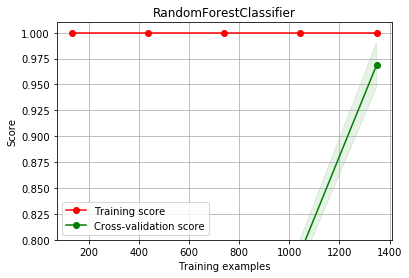

In [138]:
X = trainingMat
y = hwLabels
X_train,y_train = X, y
y_train = np.array(y_train)
title = r"RandomForestClassifier"
model = RandomForestClassifier(min_samples_leaf=1, n_estimators = 100, max_features ='sqrt')
plot_learning_curve(model, title, X_train, y_train, cv=10,ylim = (0.8,1.01))
plt.savefig("./pic/4.jpg")
plt.show()

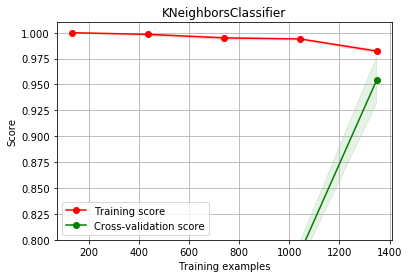

In [139]:
y = hwLabels
X_train,y_train = X, y
y_train = np.array(y_train)
title = r"KNeighborsClassifier"
model = KNeighborsClassifier(algorithm = 'ball_tree',n_neighbors = 4 )
plot_learning_curve(model, title, X_train, y_train, cv=10, ylim = (0.8,1.01))
plt.savefig("./pic/5.jpg")
plt.show()

In [39]:
y = hwLabels
X_train,y_train = X, y
y_train = np.array(y_train)
title = r"KNeighborsClassifier"
model = KNeighborsClassifier(algorithm = 'ball_tree',n_neighbors = 4 )
plot_learning_curve(model, title, X_train, y_train, cv=10, ylim = (0.8,1.01))
plt.show()
plt.savefig("./pic/KNeighborsClassifier.jpg")

numpy.ndarray

In [142]:
X = trainingMat.tolist()
y = hwLabels

In [143]:
for item in X[:]:
    X.append(item)

In [144]:
for item in y[:]:
    y.append(item)

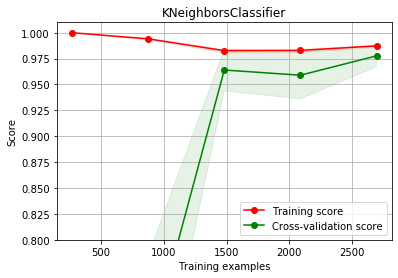

In [145]:
title = r"KNeighborsClassifier"
model = KNeighborsClassifier(algorithm = 'ball_tree',n_neighbors = 4 )
plot_learning_curve(model, title, X, y, cv=10, ylim = (0.8,1.01))
plt.savefig("./pic/6.jpg")
plt.show()

In [119]:
model = KNeighborsClassifier(algorithm = 'ball_tree',n_neighbors = 4 )
model.fit(X,y)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [131]:
testMat,goldLabels = loadData('./data/testDigits/')

In [132]:
y_pre = model.predict(testMat)

In [134]:
cal_accuracy(y_pre,goldLabels)

X_train,y_train = X, y
y_train = np.array(y_train)
title = r"RandomForestClassifier"
model = RandomForestClassifier(min_samples_leaf=1, n_estimators = 100, max_features ='sqrt')
plot_learning_curve(model, title, X_train, y_train, cv=10,ylim = (0.8,1.01))
plt.savefig("./pic/4.jpg")
plt.show()

	 测试样本个数为： 434 
	 预测错误个数为： 25 
	 预测错误率为： 5.76% 
	 预测准确率为： 94.24%


0.9423963133640553

In [147]:
trainingMat,hwLabels = loadData('./data/trainingDigits/')
testMat,goldLabels = loadData('./testfile_7/')
X = trainingMat
y = hwLabels

In [166]:
X_train,y_train = X, y
y_train = np.array(y_train)
title = r"RandomForestClassifier"
model = RandomForestClassifier(min_samples_leaf=1, n_estimators = 100, max_features ='sqrt')
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [167]:
pred = model.predict(testMat)

In [168]:
pred

array([5, 7, 4, 8, 4, 6, 6, 6, 7, 8, 8, 0, 1, 7, 0, 6, 9, 2, 5, 3, 4, 4,
       5, 5, 8, 4, 6, 5, 9, 6, 1, 6, 1, 1, 6, 0, 9, 8, 3, 5, 1, 5, 6, 9,
       2, 6, 5, 1, 4, 2, 7, 7, 5, 1, 2, 0, 3, 2, 5, 9, 9, 0, 4, 4, 7, 6,
       1, 1, 6, 7, 7, 5, 4, 0, 5, 5, 9, 0, 8, 4, 5, 1, 5, 5, 5, 9, 7, 3,
       6, 1, 6, 8, 6, 8, 9, 6, 9, 2, 5, 2, 9, 9, 8, 3, 3, 3, 6, 9, 9, 8,
       6, 3, 5, 2, 4, 9, 3, 8, 0, 1, 6, 4, 7, 2, 8, 7, 9, 6, 5, 5, 8, 0,
       3, 3, 9, 2, 0, 4, 0, 4, 9, 8, 6, 6, 2, 8, 4, 7, 7, 1, 8, 8, 4, 3,
       1, 6, 3, 0, 5, 6, 1, 5, 0, 5, 6, 8, 4, 4, 0, 9, 2, 3, 2, 5, 7, 0,
       9, 5, 1, 0, 8, 2, 4, 3, 0, 7, 7, 6, 6, 7, 4, 2, 0, 3, 3, 6, 6, 8,
       2, 3, 9, 5, 4, 4, 8, 0, 5, 1, 1, 7, 7, 0, 1, 9, 4, 5, 5, 1, 6, 0,
       1, 7, 2, 4, 4, 3, 6, 3, 6, 5, 2, 4, 4, 0, 8, 5, 5, 6, 9, 5, 4, 7,
       3, 9, 3, 4, 4, 5, 5, 4, 3, 3, 9, 1, 2, 1, 5, 9, 1, 8, 8, 4, 2, 5,
       0, 6, 7, 2, 1, 4, 7, 6, 5, 3, 9, 5, 2, 9, 9, 8, 0, 3, 3, 4, 5, 2,
       9, 0, 4, 5, 6, 1, 0, 1, 7, 5, 0, 9, 0, 5, 6,

In [172]:
f1 = open("re.txt", "a+")
for i, item in enumerate(y_pred):
    #f1.write(str(i) + "\t" + str(item) + "\n")
    print(str(goldLabels[i])+ "\t" + str(item) )

0	5
1	7
10	4
100	8
101	4
102	6
103	6
104	6
105	7
106	8
107	8
108	0
109	1
11	7
110	0
111	6
112	9
113	2
114	5
115	3
116	4
117	4
118	5
119	5
12	8
120	4
121	6
122	5
123	9
124	6
125	1
126	6
127	1
128	1
129	6
13	0
130	9
131	8
132	3
133	5
134	1
135	5
136	6
137	9
138	2
139	6
14	5
140	1
141	4
142	2
143	7
144	7
145	5
146	1
147	2
148	0
149	3
15	2
150	5
151	9
152	9
153	0
154	4
155	4
156	7
157	6
158	1
159	1
16	6
160	7
161	7
162	5
163	4
164	0
165	5
166	5
167	9
168	0
169	8
17	4
170	5
171	1
172	5
173	5
174	5
175	9
176	7
177	3
178	6
179	1
18	6
180	8
181	6
182	8
183	9
184	6
185	9
186	2
187	5
188	2
189	9
19	9
190	8
191	3
192	3
193	3
194	6
195	9
196	9
197	8
198	6
199	3
2	5
20	2
200	4
201	9
202	3
203	8
204	0
205	1
206	6
207	4
208	7
209	2
21	8
210	7
211	9
212	6
213	5
214	5
215	8
216	0
217	3
218	3
219	9
22	2
220	0
221	4
222	0
223	4
224	9
225	8
226	6
227	6
228	2
229	8
23	4
230	7
231	7
232	1
233	8
234	8
235	4
236	3
237	1
238	6
239	3
24	0
240	5
241	6
242	1
243	5
244	0
245	5
246	6
247	8
248	4
249	4
25	0
250	9
25